In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [21]:
df = pd.read_csv("C:/Users/navji/Downloads/Projects/NewBoston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [22]:
x = df.drop(['CHAS'], axis=1)
y = df['CHAS']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6738)

In [24]:
train = x_train.join(y_train)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 360 to 397
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   NOX      354 non-null    float64
 4   RM       354 non-null    float64
 5   AGE      354 non-null    float64
 6   DIS      354 non-null    float64
 7   RAD      354 non-null    int64  
 8   TAX      354 non-null    int64  
 9   PTRATIO  354 non-null    float64
 10  B        354 non-null    float64
 11  LSTAT    354 non-null    float64
 12  MEDV     354 non-null    float64
 13  CHAS     354 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 49.6 KB


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'NOX'}>],
       [<Axes: title={'center': 'RM'}>, <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'RAD'}>],
       [<Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>, <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

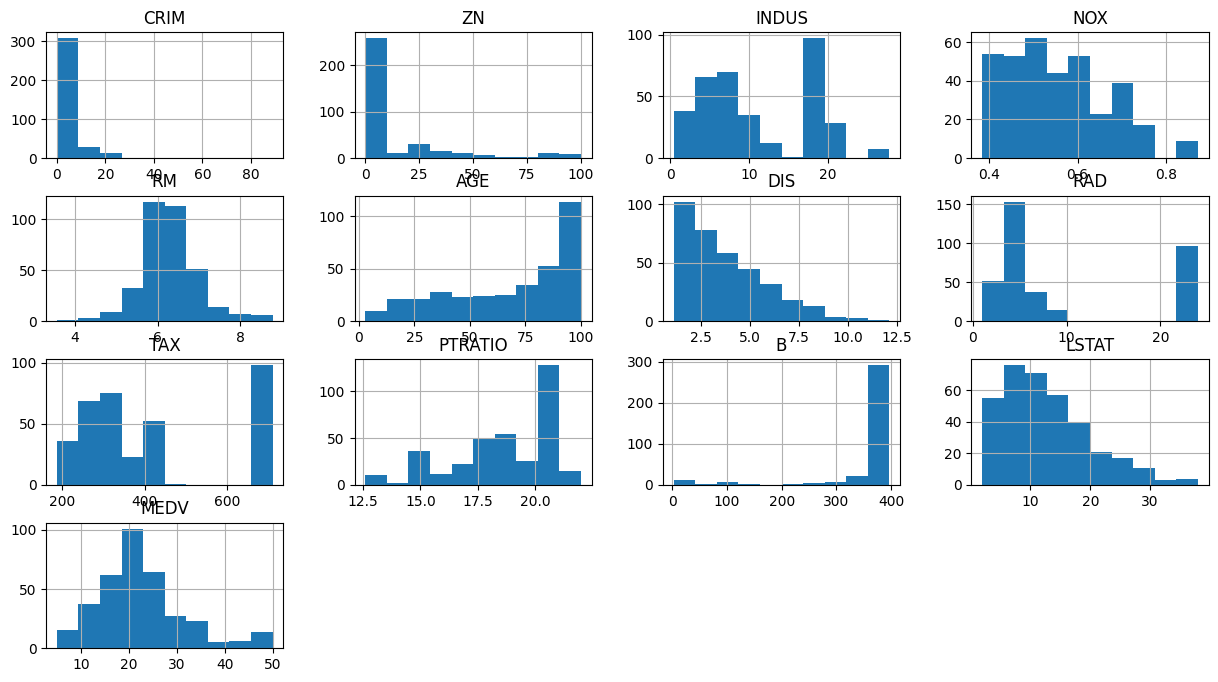

In [25]:
x_train.hist(figsize=(15, 8))

<Axes: >

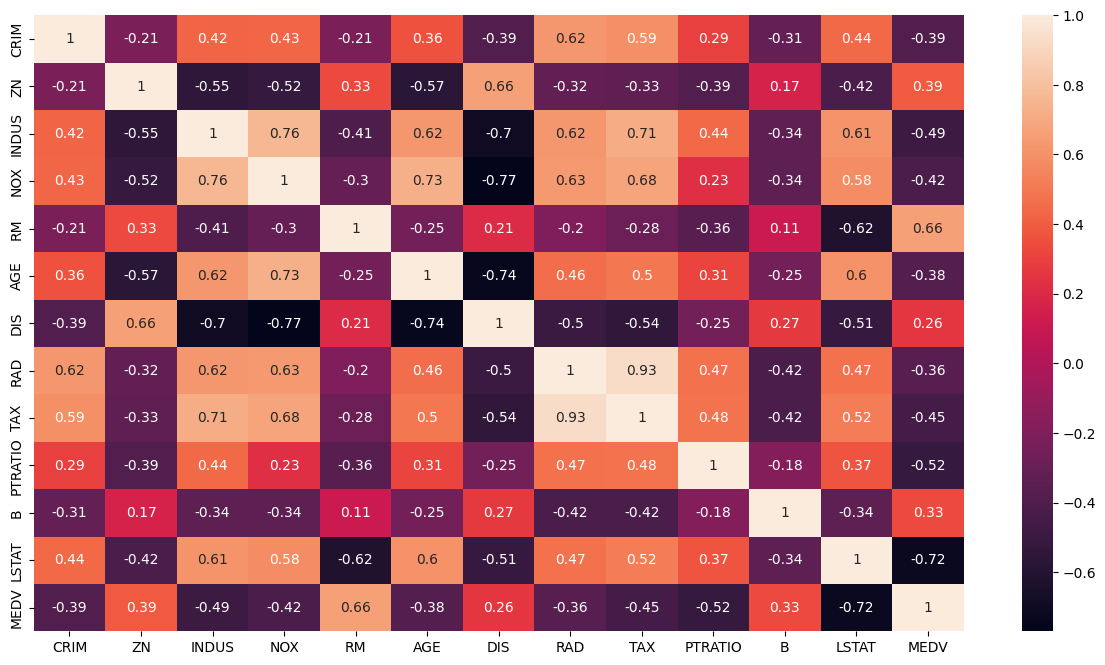

In [26]:
corr_matrix = x_train.corr().round(2)
plt.figure(figsize=(15, 8))
sns.heatmap(data=corr_matrix, annot=True)

In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\navji\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_train_pred = model.predict(x_train)
train_model_mse = mean_squared_error(y_train, y_train_pred)
print("MSE Train", round(train_model_mse, 2))
#THIS IS ONLY GOOD FOR CONTINUOUS DATA
y_test_pred = model.predict(x_test)
test_model_mse = mean_squared_error(y_test, y_test_pred)
print("MSE Test", test_model_mse)

MSE Train 0.07
MSE Test 0.07236842105263158


In [30]:
# Initializing and training the Ridge Classifier
ridge_clf = RidgeClassifier(alpha=1.0) # alpha is the regularization strength
ridge_clf.fit(x_train, y_train)

# Predicting on the test set
y_pred = ridge_clf.predict(x_test)

# Evaluating the model
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy:.4f}')

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline that first scales the data then applies RidgeClassifier with cross-validated alpha
pipeline = make_pipeline(
    StandardScaler(),
    RidgeClassifierCV(alphas=np.logspace(-6, 6, 13), cv=5)
)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Extract the RidgeClassifierCV from the pipeline
ridge_clf_cv = pipeline.named_steps['ridgeclassifiercv']

print(f'Optimal alpha: {ridge_clf_cv.alpha_}')

# Perform cross-validation to evaluate model performance
cv_scores = cross_val_score(pipeline, X, y, cv=5)

print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Average CV Accuracy: {np.mean(cv_scores):.4f}')


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize RidgeClassifierCV with a range of alpha values to find the optimal one through cross-validation
ridge_clf_cv = RidgeClassifierCV(alphas=np.logspace(-6, 6, 13), cv=5)

# Fit the RidgeClassifierCV on the scaled training data
ridge_clf_cv.fit(X_train_scaled, y_train)

# Report the best alpha found
print(f'Optimal alpha: {ridge_clf_cv.alpha_}')

# Perform cross-validation to evaluate model performance using scaled features
# Note: We need to scale the whole dataset before cross-validation
X_scaled = scaler.fit_transform(X)

# Evaluate the model's performance with cross-validation on the scaled dataset
cv_scores = cross_val_score(ridge_clf_cv, X_scaled, y, cv=5)

print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Average CV Accuracy: {np.mean(cv_scores):.4f}')
